### Problem statement
To build a CNN based model which can accurately detect melanoma. Melanoma is a type of cancer that can be deadly if not detected early. It accounts for 75% of skin cancer deaths. A solution which can evaluate images and alert the dermatologists about the presence of melanoma has the potential to reduce a lot of manual effort needed in diagnosis.

#### Data preparation and visualization 
- **Data Reading/Data Understanding** → Defining the path for train and test images. 
- **Dataset Creation** → Create train & validation dataset from the train directory with a batch size of 32. Also, make sure you resize your images to 180*180.
- **Dataset visualisation** → Create a code to visualize one instance of all the nine classes present in the dataset. 

#### Model Building & training : 
- Create a CNN model, which can accurately detect 9 classes present in the dataset. While building the model, rescale images to normalize pixel values between (0,1).
- Choose an appropriate optimiser and loss function for model training.
- Train the model for ~20 epochs.
- Write your findings after the model fit. You must check if there is any evidence of model overfit or underfit.
- Chose an appropriate data augmentation strategy to resolve underfitting/overfitting. 

#### Model Building & training on the augmented data :
- Create a CNN model, which can accurately detect 9 classes present in the dataset. While building the model rescale images to normalize pixel values between (0,1).
- Choose an appropriate optimiser and loss function for model training.
- Train the model for ~20 epochs.
- Write your findings after the model fit, see if the earlier issue is resolved or not?

#### Class distribution: Examine the current class distribution in the training dataset 
- Which class has the least number of samples?
- Which classes dominate the data in terms of the proportionate number of samples?

#### Handling class imbalances: Rectify class imbalances present in the training dataset with Augmentor library.
- Model Building & training on the rectified class imbalance data:
- Create a CNN model, which can accurately detect 9 classes present in the dataset. While building the model, rescale images to normalize pixel values between (0,1).
- Choose an appropriate optimiser and loss function for model training
- Train the model for ~30 epochs
- Write your findings after the model fit, see if the issues are resolved or not?
 

### Import the required libraries

In [1]:
# Import the required libraries

import os
import pathlib
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random as re
import time
from glob import glob
import numpy as np

# import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.data.experimental import AUTOTUNE
from tensorflow.keras.preprocessing.image import load_img

import Augmentor


**Data Reading/Data Understanding**

In [19]:
# Train & Test Image directory. 
data_dir_train = pathlib.Path("Skin cancer ISIC The International Skin Imaging Collaboration/Train/")
data_dir_test = pathlib.Path("Skin cancer ISIC The International Skin Imaging Collaboration/Test/")

In [23]:
# Count the number of image in Train and Test directory. Use 'glob' to get all the image filepath.
train_files_path = data_dir_train.glob('*/*.jpg')
test_files_path= data_dir_test.glob('*/*.jpg')

# Image count
print(f'Train Image Count: {len(list(train_files_path))}')
print(f'Test Image Count: {len(list(test_files_path))}')


Train Image Count: 2239
Test Image Count: 118


In [25]:
print(list(data_dir_train.glob('*/*.jpg'))[0])

Skin cancer ISIC The International Skin Imaging Collaboration\Train\actinic keratosis\ISIC_0025780.jpg


**Dataset Creation**

In [9]:
# Define the constants that will be used in the Models with the recommended values in problem statement.

BATCH_SIZE = 32 
IMG_HEIGHT = 180
IMG_WIDTH = 180

#### Create training and validation dataset with 80:20 Split 

In [14]:
# Training Dataset
train_ds = keras.preprocessing.image_dataset_from_directory(data_dir_train,
                                                            batch_size=BATCH_SIZE,
                                                            image_size=(IMG_HEIGHT, IMG_WIDTH),
                                                            validation_split=0.2,
                                                            subset="training",
                                                            label_mode='categorical',
                                                            seed=123                                                            
                                                            )

Found 6739 files belonging to 9 classes.
Using 5392 files for training.


In [15]:
# Validation Dataset
val_ds = keras.preprocessing.image_dataset_from_directory(data_dir_train, 
                                                         batch_size=BATCH_SIZE,
                                                         image_size=(IMG_HEIGHT, IMG_WIDTH),
                                                         validation_split=0.2, 
                                                         subset="validation",
                                                         label_mode='categorical',
                                                         seed=123)

Found 6739 files belonging to 9 classes.
Using 1347 files for validation.


In [27]:
# Get the Class Names from the Training Set
class_names = train_ds.class_names

print(f'Class Name: {class_names}')

Class Name: ['actinic keratosis', 'basal cell carcinoma', 'dermatofibroma', 'melanoma', 'nevus', 'pigmented benign keratosis', 'seborrheic keratosis', 'squamous cell carcinoma', 'vascular lesion']


**Dataset visualisation**

In [44]:
# Display one instance of the image from each Class 

# Create a dictionary to store one file path from each class
random_img_from_class = {}

for class_name in class_names: 
    # Get all files in the current class directory
    files = os.listdir(f"{data_dir_train}/{class_name}")
    
    # Pick a random file from the list
    random_file = files[re.randint(0, len(files) - 1)]
    
    # Store the full path of the random file in the dictionary
    random_img_from_class[class_name] = f"{data_dir_train}/{class_name}/{random_file}"


random_img_from_class

{'actinic keratosis': 'Skin cancer ISIC The International Skin Imaging Collaboration\\Train/actinic keratosis/ISIC_0030586.jpg',
 'basal cell carcinoma': 'Skin cancer ISIC The International Skin Imaging Collaboration\\Train/basal cell carcinoma/ISIC_0029193.jpg',
 'dermatofibroma': 'Skin cancer ISIC The International Skin Imaging Collaboration\\Train/dermatofibroma/ISIC_0025622.jpg',
 'melanoma': 'Skin cancer ISIC The International Skin Imaging Collaboration\\Train/melanoma/ISIC_0010210.jpg',
 'nevus': 'Skin cancer ISIC The International Skin Imaging Collaboration\\Train/nevus/ISIC_0000422.jpg',
 'pigmented benign keratosis': 'Skin cancer ISIC The International Skin Imaging Collaboration\\Train/pigmented benign keratosis/ISIC_0025292.jpg',
 'seborrheic keratosis': 'Skin cancer ISIC The International Skin Imaging Collaboration\\Train/seborrheic keratosis/ISIC_0011043.jpg',
 'squamous cell carcinoma': 'Skin cancer ISIC The International Skin Imaging Collaboration\\Train/squamous cell car

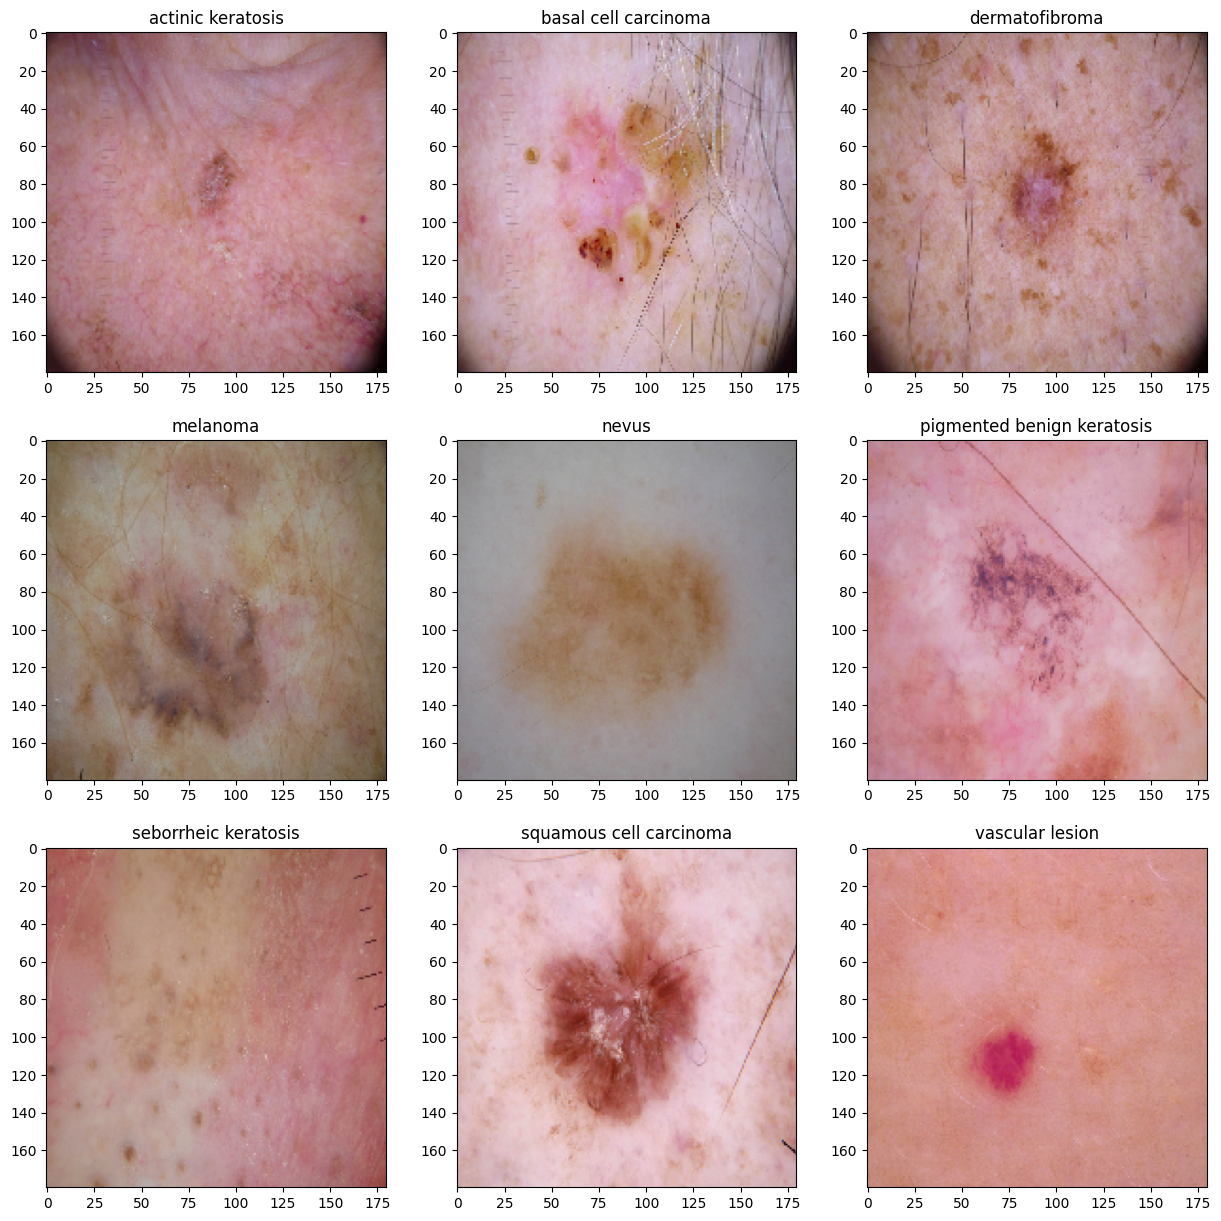

In [48]:

# Visualize image 
plt.figure(figsize=(15,15))
index = 0
for class_name in class_names:
    class_image_path = random_img_from_class[class_name]
    index += 1
    plt.subplot(3,3,index)
    plt.imshow(load_img(class_image_path ,target_size=(IMG_HEIGHT, IMG_WIDTH)))
    plt.title(class_name)

The `image_batch` is a tensor of the shape `(32, 180, 180, 3)`. This is a batch of 32 images of shape `180x180x3` (the last dimension refers to color channels RGB). The `label_batch` is a tensor of the shape `(32,)`, these are corresponding labels to the 32 images.

`Dataset.cache()` keeps the images in memory after they're loaded off disk during the first epoch.

`Dataset.prefetch()` overlaps data preprocessing and model execution while training.

### Model Building & Training on existing dataset

In [49]:
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [50]:
# The input image share would be the height x Width x Color Channel(RGB) - 180 x 180 x 3.
input_image_shape = (IMG_HEIGHT, IMG_WIDTH, 3)

In [51]:
model = Sequential() 

# First Convolutional Layer
model.add(layers.Rescaling(1./255, input_shape=input_image_shape))
model.add(layers.Conv2D(32, kernel_size=(3,3), activation='relu'))
model.add(layers.MaxPool2D(pool_size=(2,2)))

# Second Convolutional Layer
model.add(layers.Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(layers.MaxPool2D(pool_size=(2,2)))

# Third Convolutional Layer
model.add(layers.Conv2D(128, kernel_size=(3,3), activation='relu'))
model.add(layers.MaxPool2D(pool_size=(2,2)))

# Flatten function flattens the multi-dimensional input tensors into a single dimension
model.add(layers.Flatten())   

# Dense Layer
model.add(layers.Dense(512, activation='relu'))

# Dense Layer
model.add(layers.Dense(128, activation='relu'))

# Dense Layer with softmax activation function to scale numbers/logits into probabilities
model.add(layers.Dense(len(class_names), activation='softmax'))

d:\Python312\Lib\site-packages\keras\src\layers\preprocessing\tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [52]:

# Adam Optimization: A stochastic gradient descent algorithm that adapts learning rates for each parameter 
# based on estimates of first-order (mean) and second-order (variance) moments.

# Categorical Crossentropy: A loss function used for multi-class classification models, 
# particularly when the output labels belong to two or more distinct classes.

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])


In [54]:
# Model summary representation
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ rescaling (Rescaling)           │ (None, 180, 180, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 178, 178, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 89, 89, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 87, 87, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 43, 43, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 41, 41, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 20, 20, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 51200)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │    26,214,912 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │        65,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 9)              │         1,161 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 26,374,985 (100.61 MB)

 Trainable params: 26,374,985 (100.61 MB)

 Non-trainable params: 0 (0.00 B)

In [55]:
epochs = 20 # Epochs set to 20 as suggested in the Case Study for initial model training

In [58]:
# Model Training
# Measure the time taken to train the model

start_time = time.time()

history = model.fit(train_ds, 
                    validation_data=val_ds, 
                    epochs=epochs)

end_time = time.time()

Epoch 1/20
169/169 ━━━━━━━━━━━━━━━━━━━━ 98s 485ms/step - accuracy: 0.1591 - loss: 2.2964 - val_accuracy: 0.2814 - val_loss: 1.7784
Epoch 2/20
169/169 ━━━━━━━━━━━━━━━━━━━━ 85s 503ms/step - accuracy: 0.3941 - loss: 1.5972 - val_accuracy: 0.4432 - val_loss: 1.4137
Epoch 3/20
169/169 ━━━━━━━━━━━━━━━━━━━━ 88s 522ms/step - accuracy: 0.4897 - loss: 1.3448 - val_accuracy: 0.4967 - val_loss: 1.3070
Epoch 4/20
169/169 ━━━━━━━━━━━━━━━━━━━━ 88s 520ms/step - accuracy: 0.5940 - loss: 1.0946 - val_accuracy: 0.6362 - val_loss: 0.9874
Epoch 5/20
169/169 ━━━━━━━━━━━━━━━━━━━━ 88s 521ms/step - accuracy: 0.6710 - loss: 0.9178 - val_accuracy: 0.6763 - val_loss: 0.9081
Epoch 6/20
169/169 ━━━━━━━━━━━━━━━━━━━━ 89s 529ms/step - accuracy: 0.7480 - loss: 0.7047 - val_accuracy: 0.7454 - val_loss: 0.6918
Epoch 7/20
169/169 ━━━━━━━━━━━━━━━━━━━━ 87s 517ms/step - accuracy: 0.7986 - loss: 0.5408 - val_accuracy: 0.7550 - val_loss: 0.6704
Epoch 8/20
169/169 ━━━━━━━━━━━━━━━━━━━━ 89s 526ms/step - accuracy: 0.8484 - loss: 0

In [60]:

# Calculate the elapsed time in seconds
elapsed_time = end_time - start_time

# Convert seconds to minutes and seconds
minutes = int(elapsed_time // 60)
seconds = int(elapsed_time % 60)

# Print the result
print(f"Training completed in {minutes} minutes and {seconds} seconds.")

Training completed in 31 minutes and 38 seconds.


### Visualizing training results

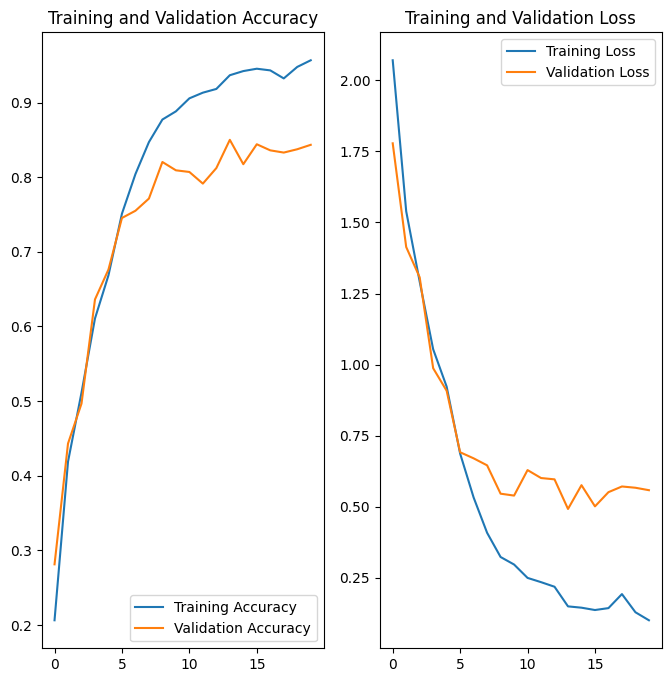

In [61]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### Model Evaluation
- The model achieves **96% training accuracy** with a low training loss of **0.10**, indicating effective learning on the training data.  
- The **validation accuracy is 84%**, which is **12% lower** than the training accuracy, showing a gap in generalization.  
- The **validation loss of 0.56** is significantly higher than the training loss, suggesting the model struggles with unseen data.  
- These differences between training and validation metrics indicate **overfitting**, where the model memorizes the training data instead of learning generalizable patterns.


### Model Building & training on the augmented data

#### Data Augmentation Strategy:
- **Rescaling**: Normalize input pixel values from the range [0, 255] to [0, 1].  
- **Random Flipping**: Apply horizontal and vertical flips to images randomly.  
- **Random Rotation**: Rotate images randomly by a specified degree during training.  
- **Random Zoom**: Zoom in or out on images randomly during training.  
- **Random Translation**: Shift images horizontally and vertically by a random amount during training.  

In [63]:
rescale = keras.Sequential([
                            layers.Rescaling(1./255)
                          ])

data_augmentation = keras.Sequential([
                                      layers.RandomFlip("horizontal_and_vertical"),
                                      layers.RandomRotation(0.2),
                                      layers.RandomZoom(0.2),
                                      layers.RandomTranslation(0.1, 0.1)    
                                      ])

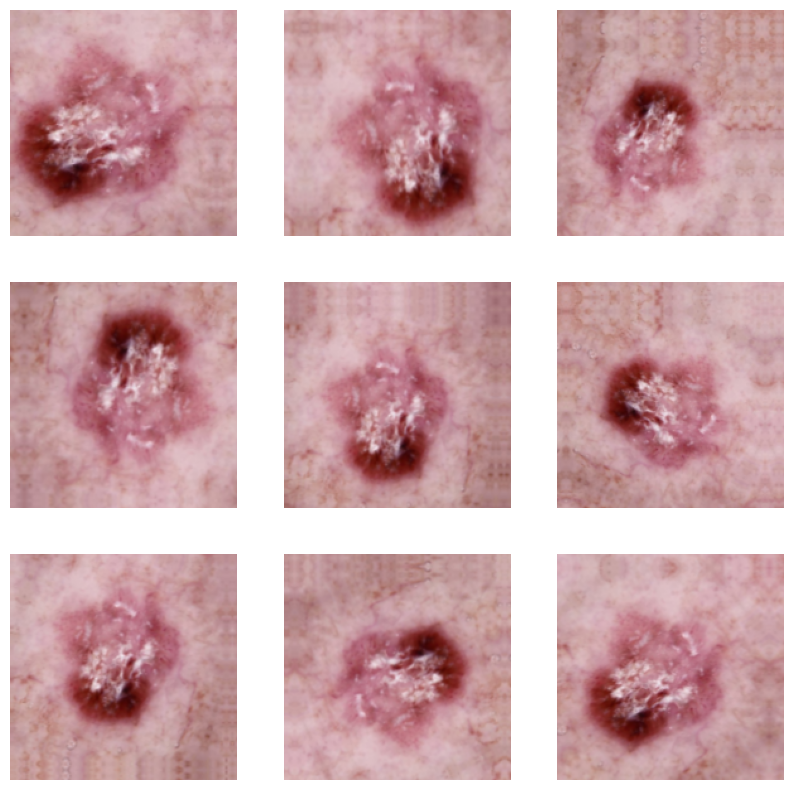

In [69]:
# Visualize the augmented images
plt.figure(figsize=(10, 10))

# Iterate over one batch of images from the training dataset
for batch_images, _ in train_ds.take(1):   
    # Display 9 augmented images
    for idx in range(9):
        # Apply the data augmentation to each image in the batch
        augmented_image = data_augmentation(batch_images)
        
        # Create a subplot for each image in a 3x3 grid
        ax = plt.subplot(3, 3, idx + 1)
        
        # Display the first augmented image from the batch
        plt.imshow(augmented_image[0].numpy().astype("uint8"))
        
        # Hide axis labels
        plt.axis("off")


#### Creating the Second model with augmented data

In [70]:

model2 = Sequential()  # Sequential model for layer-by-layer construction

# Data Augmentation Layer
# Applying random transformations to the input images to increase the diversity of the training data.
# Helps the model generalize better by exposing it to varied versions of the images.
model2.add(data_augmentation)

# Rescaling Layer
# Rescaling the input pixel values from [0, 255] to [0, 1] for improved model convergence.
model2.add(rescale)

# First Convolutional Layer
# Applying 32 filters with a 3x3 kernel size and ReLU activation to learn spatial patterns in the images.
# MaxPooling helps downsample the image, reducing dimensionality and retaining important features.
model2.add(layers.Conv2D(32, kernel_size=(3, 3), activation='relu'))
model2.add(layers.MaxPool2D(pool_size=(2, 2)))

# Dropout Layer (after Conv1)
# Randomly drops 25% of the units to prevent the model from overfitting during training.
model2.add(layers.Dropout(0.25))

# Second Convolutional Layer
# Applying 64 filters with a 3x3 kernel size to learn more complex patterns in the images.
# MaxPooling continues to reduce spatial dimensions while retaining key information.
model2.add(layers.Conv2D(64, kernel_size=(3, 3), activation='relu'))
model2.add(layers.MaxPool2D(pool_size=(2, 2)))

# Dropout Layer (after Conv2)
# Another 25% dropout applied to prevent overfitting and ensure the model generalizes well.
model2.add(layers.Dropout(0.25))

# Third Convolutional Layer
# Using 128 filters with a 3x3 kernel size to capture deeper and more abstract features from the image.
model2.add(layers.Conv2D(128, kernel_size=(3, 3), activation='relu'))
model2.add(layers.MaxPool2D(pool_size=(2, 2)))

# Flatten Layer
# Flattens the multi-dimensional tensor from the convolutional layers into a 1D vector
# to prepare it for the fully connected layers (dense layers).
model2.add(layers.Flatten())

# Dense Layer
# A fully connected layer with 512 units and ReLU activation to learn high-level representations of the features.
model2.add(layers.Dense(512, activation='relu'))

# Dense Layer
# A smaller fully connected layer with 128 units to further refine the learned features.
model2.add(layers.Dense(128, activation='relu'))

# Dropout Layer (after Dense)
# A 50% dropout rate in the dense layers to help prevent overfitting by dropping half of the units during training.
model2.add(layers.Dropout(0.50))

# Output Layer
# A softmax layer with the number of classes as units, to output class probabilities for multi-class classification.
# The softmax function ensures the output values are in the range [0, 1] and sum up to 1, representing probabilities.
model2.add(layers.Dense(len(class_names), activation='softmax'))


### Compiling the model

In [71]:

model2.compile(optimizer='Adam',
              loss="categorical_crossentropy",
              metrics=['accuracy'])


### Training the model

In [72]:
# Fit the model
epochs = 20
history = model2.fit(train_ds, epochs=epochs, validation_data=val_ds, verbose=1)


Epoch 1/20
169/169 ━━━━━━━━━━━━━━━━━━━━ 99s 574ms/step - accuracy: 0.1260 - loss: 2.7935 - val_accuracy: 0.1403 - val_loss: 2.1857
Epoch 2/20
169/169 ━━━━━━━━━━━━━━━━━━━━ 109s 645ms/step - accuracy: 0.1472 - loss: 2.1722 - val_accuracy: 0.1403 - val_loss: 2.1877
Epoch 3/20
169/169 ━━━━━━━━━━━━━━━━━━━━ 113s 670ms/step - accuracy: 0.1391 - loss: 2.1787 - val_accuracy: 0.1411 - val_loss: 2.1890
Epoch 4/20
169/169 ━━━━━━━━━━━━━━━━━━━━ 113s 671ms/step - accuracy: 0.1441 - loss: 2.1824 - val_accuracy: 0.1507 - val_loss: 2.1841
Epoch 5/20
169/169 ━━━━━━━━━━━━━━━━━━━━ 116s 685ms/step - accuracy: 0.1478 - loss: 2.1766 - val_accuracy: 0.1411 - val_loss: 2.1887
Epoch 6/20
169/169 ━━━━━━━━━━━━━━━━━━━━ 116s 688ms/step - accuracy: 0.1378 - loss: 2.1810 - val_accuracy: 0.1596 - val_loss: 2.1617
Epoch 7/20
169/169 ━━━━━━━━━━━━━━━━━━━━ 116s 688ms/step - accuracy: 0.1361 - loss: 2.1787 - val_accuracy: 0.1433 - val_loss: 2.1849
Epoch 8/20
169/169 ━━━━━━━━━━━━━━━━━━━━ 111s 658ms/step - accuracy: 0.1306 - 

### Visualizing the results

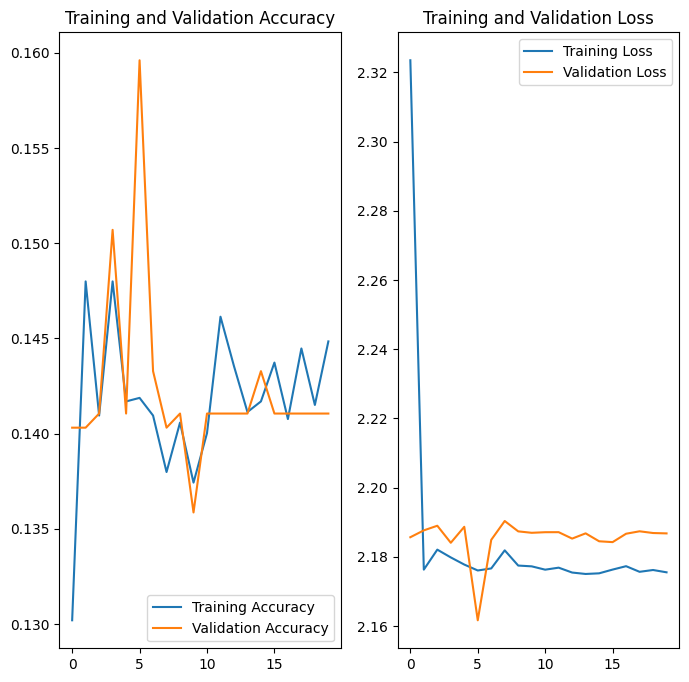

In [73]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()



- After using data augumentation and dropout layer overfitting issue is reduce.

- Model Performance is still not increased. Will check the distribution of classes in the training set to check is there have class imbalance.

### Class Distribution

In [74]:
def class_distribution_count(class_directories):
    # Get class names and their respective image counts
    class_dirs = [path for path in pathlib.Path(class_directories).iterdir() if path.is_dir()]
    count = [len([f for f in os.listdir(class_dir) if os.path.isfile(class_dir / f)]) for class_dir in class_dirs]
    class_names = [class_dir.name for class_dir in class_dirs]
    
    # Return dataframe with class names and image counts
    return pd.DataFrame({'Class': class_names, 'No. of Images': count})



In [75]:
class_distribution_df = class_distribution_count(data_dir_train)
class_distribution_df 

,Class,No. of Images
0,actinic keratosis,114
1,basal cell carcinoma,376
2,dermatofibroma,95
3,melanoma,438
4,nevus,357
5,pigmented benign keratosis,462
6,seborrheic keratosis,77
7,squamous cell carcinoma,181
8,vascular lesion,139


In [76]:
import seaborn as sns

C:\Users\Saurav Suman\AppData\Local\Temp\ipykernel_19656\3654164258.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="No. of Images",          # X-axis: number of images
C:\Users\Saurav Suman\AppData\Local\Temp\ipykernel_19656\3654164258.py:11: UserWarning: The palette list has more values (10) than needed (9), which may not be intended.
  sns.barplot(x="No. of Images",          # X-axis: number of images


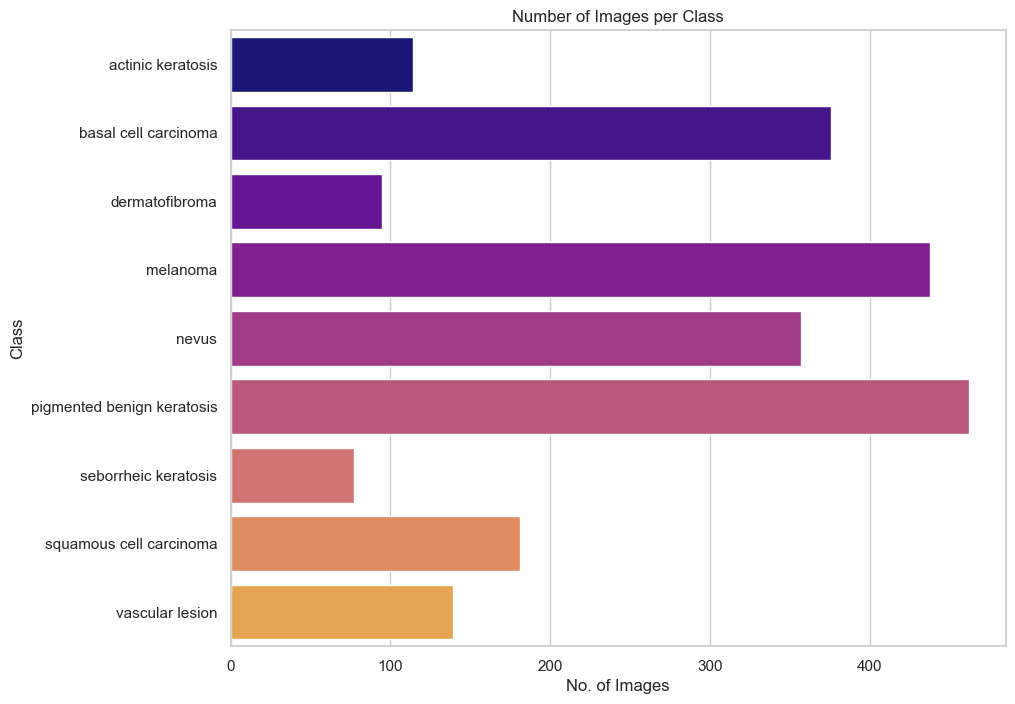

In [84]:
# Visualize the number of images in each class

plt.figure(figsize=(10, 8))
# Define the colormap
cmap = plt.cm.plasma 
num_colors = 10
colors = [cmap(i / num_colors) for i in range(num_colors)]
# Create a color palette based on the 'No. of Images' column, from high to low


sns.barplot(x="No. of Images",          # X-axis: number of images
            y="Class",                  # Y-axis: class names
            data=class_distribution_df, # Data from the dataframe
            palette=colors, 
            label="Class"               # Label for the legend
            )

plt.title("Number of Images per Class")
plt.show()

- The seborrheic keratosis class has the fewest samples, with only 77 instances.

- The classes pigmented benign keratosis (462 samples), melanoma (438 samples), basal cell carcinoma (376 samples), and nevus (357 samples) have the highest proportion of samples, dominating the dataset.


####  Handling class imbalances
As per the recommendation in the case study we can rectify class imbalances present in the training dataset with Augmentor library

### Using `Augmentor` for Image Augmentation

To use `Augmentor`, follow these general steps:

1. **Instantiate a `Pipeline` Object**: Create a `Pipeline` object and point it to the directory containing your initial image dataset.
2. **Define Operations**: Specify the operations to apply to your dataset using the `Pipeline` object.
3. **Execute Operations**: Call the `sample()` method on the `Pipeline` to execute the defined operations and apply them to the images.



In [89]:
path_to_training_dataset="Skin cancer ISIC The International Skin Imaging Collaboration/Train/"

for i in class_names:
    p = Augmentor.Pipeline(path_to_training_dataset + i)
    p.rotate(probability=0.7, max_left_rotation=10, max_right_rotation=10)
    p.sample(500) 

Initialised with 114 image(s) found.
Output directory set to CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/actinic keratosis\output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x170D37BCDA0>: 100%|██████████| 500/500 [00:03<00:00, 164.25 Samples/s]


Initialised with 376 image(s) found.
Output directory set to CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/basal cell carcinoma\output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x16E8DFC1310>: 100%|██████████| 500/500 [00:02<00:00, 176.73 Samples/s]                  


Initialised with 95 image(s) found.
Output directory set to CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/dermatofibroma\output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x16E8EBD3E90>: 100%|██████████| 500/500 [00:05<00:00, 95.75 Samples/s]                   


Initialised with 438 image(s) found.
Output directory set to CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/melanoma\output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=1024x768 at 0x170D37D07A0>: 100%|██████████| 500/500 [00:25<00:00, 19.31 Samples/s] 


Initialised with 357 image(s) found.
Output directory set to CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/nevus\output.

Processing <PIL.Image.Image image mode=RGB size=2101x1943 at 0x170D18926F0>: 100%|██████████| 500/500 [00:24<00:00, 20.50 Samples/s]                  


Initialised with 462 image(s) found.
Output directory set to CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/pigmented benign keratosis\output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x170D1A6C170>: 100%|██████████| 500/500 [00:05<00:00, 96.48 Samples/s] 


Initialised with 77 image(s) found.
Output directory set to CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/seborrheic keratosis\output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=1024x768 at 0x170D37A4F50>: 100%|██████████| 500/500 [00:11<00:00, 42.62 Samples/s]


Initialised with 181 image(s) found.
Output directory set to CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/squamous cell carcinoma\output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x170D37D5BB0>: 100%|██████████| 500/500 [00:05<00:00, 85.45 Samples/s] 


Initialised with 139 image(s) found.
Output directory set to CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/vascular lesion\output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x170D1893B90>: 100%|██████████| 500/500 [00:05<00:00, 90.89 Samples/s]                   


Augmentor has stored the augmented images in the output sub-directory of each of the sub-directories of skin cancer types.. Lets take a look at total count of augmented images.

In [17]:
#Count total number of image generated by Augmentor.
image_count_train = len(list(data_dir_train.glob('*/output/*.jpg')))
print(image_count_train)

4500


### see the distribution of augmented data after adding new images to the original training data.

In [18]:
from glob import glob
path_list = [x for x in glob(os.path.join(data_dir_train, '*','output', '*.jpg'))]
#path_list

In [19]:
lesion_list_new = [os.path.basename(os.path.dirname(os.path.dirname(y))) for y in glob(os.path.join(data_dir_train, '*','output', '*.jpg'))]
#lesion_list_new

In [20]:
dataframe_dict_new = dict(zip(path_list, lesion_list_new))

In [21]:
#dataframe that store path and label of the images generated by Augmentor
df2 = pd.DataFrame(list(dataframe_dict_new.items()),columns = ['Path','Label'])

In [22]:
#label count.
df2['Label'].value_counts()

Label
actinic keratosis             500
basal cell carcinoma          500
dermatofibroma                500
melanoma                      500
nevus                         500
pigmented benign keratosis    500
seborrheic keratosis          500
squamous cell carcinoma       500
vascular lesion               500
Name: count, dtype: int64

So, now we have added 500 images to all the classes to maintain some class balance. We can add more images as we want to improve training process.

####  Train the model on the data created using Augmentor

####  Create a training dataset

In [90]:
data_dir_train="Skin cancer ISIC The International Skin Imaging Collaboration/Train/" 

# Create a Traning dataset with 80:20 split
train_ds = keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,    #20% fraction of data to reserve for validation.
  subset = "training",
  image_size=(IMG_HEIGHT, IMG_WIDTH),label_mode='categorical',  #label_mode='categorical' means that the labels are encoded as a categorical vector 
  batch_size=BATCH_SIZE)

Found 6739 files belonging to 9 classes.
Using 5392 files for training.


#### Create a validation dataset

In [91]:
# Create a Validation dataset with 80:20 split
val_ds = keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  
  subset = "validation",
  image_size=(IMG_HEIGHT, IMG_WIDTH),label_mode='categorical',  #label_mode='categorical' means that the labels are encoded as a categorical vector
  batch_size=BATCH_SIZE)

Found 6739 files belonging to 9 classes.
Using 1347 files for validation.


#### Create model 

In [92]:
#--------------
# Model definition
model3 = Sequential()

# Rescaling Layer: Rescale pixel values to the range [0, 1] to normalize the input data.
model3.add(rescale)

# First Convolutional Layer:
# Apply 32 filters with a 2x2 kernel to capture basic features, followed by MaxPooling to reduce spatial dimensions.
# Dropout is added to reduce overfitting.
model3.add(layers.Conv2D(32, kernel_size=(2, 2), activation='relu'))
model3.add(layers.MaxPool2D(pool_size=(2, 2)))
model3.add(layers.Dropout(0.25))

# Second Convolutional Layer:
# Apply 64 filters with a 2x2 kernel to capture more complex features, followed by MaxPooling.
# Dropout to prevent overfitting.
model3.add(layers.Conv2D(64, kernel_size=(2, 2), activation='relu'))
model3.add(layers.MaxPool2D(pool_size=(2, 2)))
model3.add(layers.Dropout(0.25))

# Third Convolutional Layer:
# Apply 128 filters with a 2x2 kernel to capture deeper features.
model3.add(layers.Conv2D(128, kernel_size=(2, 2), activation='relu'))
model3.add(layers.MaxPool2D(pool_size=(2, 2)))

# Flatten Layer: Flattens the output of the convolutional layers to a 1D vector for input to fully connected layers.
model3.add(layers.Flatten())

# Fully Connected Dense Layer:
# A dense layer with 512 units and ReLU activation to learn high-level features from the image data.
model3.add(layers.Dense(512, activation='relu'))

# Dropout Layer: Drop 25% of the input units to prevent overfitting during training.
model3.add(layers.Dropout(0.25))

# Batch Normalization Layer:
# Normalizes the inputs to the layer by re-centering and re-scaling, helping the model train faster and improving stability.
model3.add(layers.BatchNormalization())

# Fully Connected Dense Layer:
# A smaller dense layer with 128 units to learn more refined features from the data.
model3.add(layers.Dense(128, activation='relu'))

# Dropout Layer: Drop 50% of the input units to prevent overfitting during training.
model3.add(layers.Dropout(0.50))

# Batch Normalization Layer:
# Another batch normalization to stabilize training and improve convergence.
model3.add(layers.BatchNormalization())

# Output Layer:
# Softmax activation to output class probabilities, for multi-class classification.
model3.add(layers.Dense(len(class_names), activation='softmax'))


#### Compile Model

In [93]:

model3.compile(optimizer='Adam',
              loss="categorical_crossentropy",
              metrics=['accuracy'])


####  Train your model

In [94]:
epochs = 30
history = model3.fit(train_ds, epochs=epochs, validation_data=val_ds, verbose=1)

Epoch 1/30
169/169 ━━━━━━━━━━━━━━━━━━━━ 82s 470ms/step - accuracy: 0.1273 - loss: 2.7358 - val_accuracy: 0.1700 - val_loss: 2.4256
Epoch 2/30
169/169 ━━━━━━━━━━━━━━━━━━━━ 91s 538ms/step - accuracy: 0.2447 - loss: 2.0679 - val_accuracy: 0.2665 - val_loss: 2.5163
Epoch 3/30
169/169 ━━━━━━━━━━━━━━━━━━━━ 92s 545ms/step - accuracy: 0.2850 - loss: 1.8847 - val_accuracy: 0.2821 - val_loss: 2.5711
Epoch 4/30
169/169 ━━━━━━━━━━━━━━━━━━━━ 92s 545ms/step - accuracy: 0.3492 - loss: 1.7008 - val_accuracy: 0.2806 - val_loss: 1.8675
Epoch 5/30
169/169 ━━━━━━━━━━━━━━━━━━━━ 88s 519ms/step - accuracy: 0.4150 - loss: 1.5503 - val_accuracy: 0.3571 - val_loss: 1.5941
Epoch 6/30
169/169 ━━━━━━━━━━━━━━━━━━━━ 87s 516ms/step - accuracy: 0.4021 - loss: 1.5376 - val_accuracy: 0.3073 - val_loss: 1.8662
Epoch 7/30
169/169 ━━━━━━━━━━━━━━━━━━━━ 88s 520ms/step - accuracy: 0.4331 - loss: 1.4552 - val_accuracy: 0.3267 - val_loss: 1.7103
Epoch 8/30
169/169 ━━━━━━━━━━━━━━━━━━━━ 88s 518ms/step - accuracy: 0.4503 - loss: 1

####  Visualize the model results

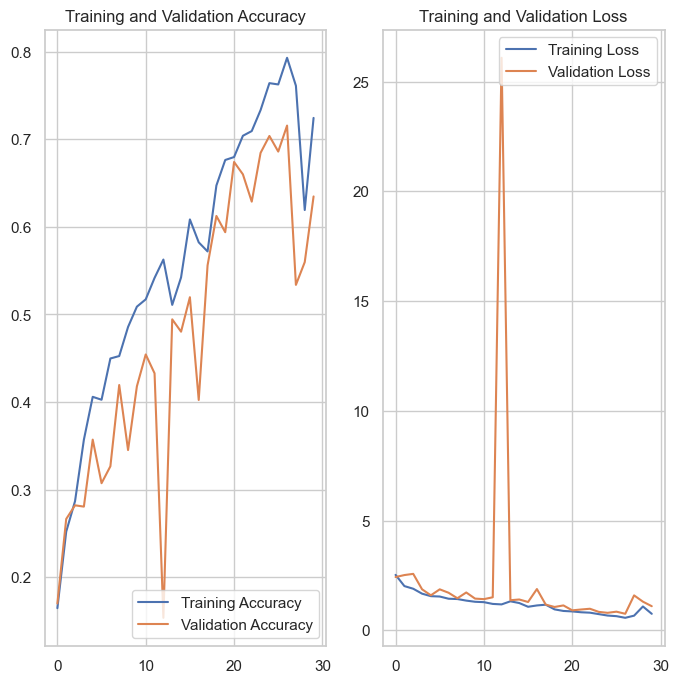

In [95]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

***Observations:***

1. The ultimate model showcases well-balanced performance, displaying no signs of underfitting or overfitting.

2. The implementation of class rebalancing has notably enhanced the model's performance across both training and validation datasets.

3. Following 30 epochs, the final model attains an accuracy of 74% on the training set and approximately 71% on the validation set.

4. The narrow divergence between training and validation accuracies underscores the robust generalization capability of the final CNN model.

5. The addition of batch normalization failed to enhance both training and validation accuracy.

## Model Prediction

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
Actual Class:		basal cell carcinoma
Model Predicted Class:  basal cell carcinoma


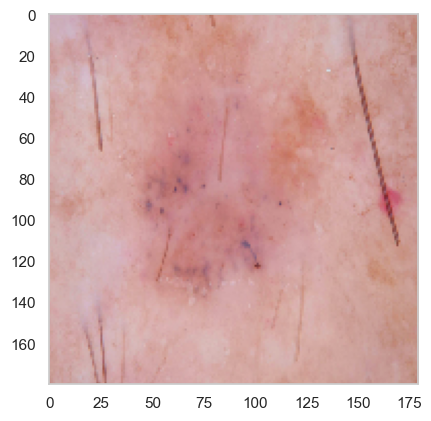

In [119]:

Test_image_path = os.path.join(data_dir_test, class_names[re.randint(0, 8)], '*')
Test_image = glob(Test_image_path)
# Test_image = load_img(Test_image[-1],target_size=(180,180,3))
Test_image = load_img(Test_image[re.randint(0, len(Test_image)-1)],target_size=(180,180,3))
plt.imshow(Test_image)
plt.grid(False)

img = np.expand_dims(Test_image,axis=0)
pred = model.predict(img)
pred = np.argmax(pred)
pred_class = class_names[pred]
print("Actual Class:\t\t" + class_names[1] + '\n' + "Model Predicted Class: " + " " + pred_class )